In [39]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
from IPython.display import Image
%matplotlib inline
import dateutil.parser

In [40]:
import seaborn as sns

In [2]:
cols = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']

df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt')
df.columns = cols

In [3]:
df.shape

(197416, 11)

In [4]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676


In [5]:
df.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS'],
      dtype='object')

In [6]:
df['NEW_TIME'] = pd.to_datetime(df['DATE'] + df['TIME'], format = '%m/%d/%Y%H:%M:%S')
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,2017-06-17 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,2017-06-17 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,2017-06-17 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,2017-06-17 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,2017-06-17 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,2017-06-17 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,2017-06-18 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,2017-06-18 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,2017-06-18 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,2017-06-18 12:00:00


In [7]:
df['TIMEDIFF_ENTRIES'] = df['ENTRIES'].diff(periods = 1)  
df['TIMEDIFF_EXITS'] = df['EXITS'].diff(periods = 1) 
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,2017-06-17 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,2017-06-17 04:00:00,34.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,2017-06-17 08:00:00,35.0,30.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,2017-06-17 12:00:00,120.0,100.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,2017-06-17 16:00:00,243.0,61.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,2017-06-17 20:00:00,300.0,52.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,2017-06-18 00:00:00,168.0,21.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,2017-06-18 04:00:00,25.0,4.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,2017-06-18 08:00:00,21.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,2017-06-18 12:00:00,117.0,69.0


In [8]:
df.fillna(value = 0)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,2017-06-17 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,2017-06-17 04:00:00,34.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,2017-06-17 08:00:00,35.0,30.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,2017-06-17 12:00:00,120.0,100.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,2017-06-17 16:00:00,243.0,61.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,2017-06-17 20:00:00,300.0,52.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,2017-06-18 00:00:00,168.0,21.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,2017-06-18 04:00:00,25.0,4.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,2017-06-18 08:00:00,21.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,2017-06-18 12:00:00,117.0,69.0


In [9]:
df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,2017-06-17 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,2017-06-17 04:00:00,34.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,2017-06-17 08:00:00,35.0,30.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,2017-06-17 12:00:00,120.0,100.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,2017-06-17 16:00:00,243.0,61.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,2017-06-17 20:00:00,300.0,52.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,2017-06-18 00:00:00,168.0,21.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,2017-06-18 04:00:00,25.0,4.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,2017-06-18 08:00:00,21.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,2017-06-18 12:00:00,117.0,69.0


In [10]:
#Challenge 1: 
col_groups = df.groupby(['C/A','UNIT','SCP','STATION'])

In [11]:
col_groups.first()

LINENAME DIVISION        DATE      TIME  \
C/A   UNIT SCP      STATION                                                 
A002  R051 02-00-00 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-00-01 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-00 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-01 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-02 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-03 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-04 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-05 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-03-06 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-05-00 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-05-01 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
           02-06-00 59 ST          NQR456W      BMT  06/17/2017  00:00:00   
A006  R079 00-00-00 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-00-01 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-00-02 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-00-03 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-00-04 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-03-00 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-03-01 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           00-03-02 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
A007  R079 01-05-00 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           01-05-01 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           01-06-00 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           01-06-01 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           01-06-02 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
           01-06-03 5 AV/59 ST        NQRW      BMT  06/17/2017  02:00:00   
A010  R080 00-00-00 57 ST-7 AV        NQRW      BMT  06/17/2017  00:00:00   
           00-00-01 57 ST-7 AV        NQRW      BMT  06/17/2017  00:00:00   
           00-00-02 57 ST-7 AV        NQRW      BMT  06/17/2017  00:00:00   
           00-00-03 57 ST-7 AV        NQRW      BMT  06/17/2017  00:00:00   
...                                    ...      ...         ...       ...   
S101A R070 01-00-00 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-00-01 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-00-02 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-00-03 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-00-04 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-00-05 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-00-06 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-03-00 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-03-01 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-03-02 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-03-03 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-05-00 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
           01-05-01 ST. GEORGE           1      SRT  06/17/2017  00:00:00   
S102  R165 00-00-00 TOMPKINSVILLE        1      SRT  06/17/2017  02:00:00   
           00-00-01 TOMPKINSVILLE        1      SRT  06/17/2017  02:00:00   
           00-03-00 TOMPKINSVILLE        1      SRT  06/17/2017  02:00:00   
           00-03-01 TOMPKINSVILLE        1      SRT  06/17/2017  02:00:00   
           00-03-02 TOMPKINSVILLE        1      SRT  06/17/2017  02:00:00   
           00-05-00 TOMPKINSVILLE        1      SRT  06/17/2017  02:00:00   
           00-05-01 TOMPKINSVI

In [12]:
#Challenge 2:
date_groups = df.groupby(['C/A','UNIT','SCP','STATION'])
date_groups.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,2017-06-17 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,2017-06-17 04:00:00,34.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,2017-06-17 08:00:00,35.0,30.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,2017-06-17 12:00:00,120.0,100.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,2017-06-17 16:00:00,243.0,61.0
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,5621478,1248984,2017-06-17 00:00:00,-612022.0,-861426.0
43,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,5621501,1248987,2017-06-17 04:00:00,23.0,3.0
44,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,5621519,1249008,2017-06-17 08:00:00,18.0,21.0
45,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,5621643,1249060,2017-06-17 12:00:00,124.0,52.0
46,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,5621888,1249104,2017-06-17 16:00:00,245.0,44.0


In [13]:
date_groups = date_groups['C/A','UNIT','SCP','STATION','NEW_TIME']

In [14]:
date_groups.first()

C/A  UNIT       SCP        STATION  \
C/A   UNIT SCP      STATION                                               
A002  R051 02-00-00 59 ST           A002  R051  02-00-00          59 ST   
           02-00-01 59 ST           A002  R051  02-00-01          59 ST   
           02-03-00 59 ST           A002  R051  02-03-00          59 ST   
           02-03-01 59 ST           A002  R051  02-03-01          59 ST   
           02-03-02 59 ST           A002  R051  02-03-02          59 ST   
           02-03-03 59 ST           A002  R051  02-03-03          59 ST   
           02-03-04 59 ST           A002  R051  02-03-04          59 ST   
           02-03-05 59 ST           A002  R051  02-03-05          59 ST   
           02-03-06 59 ST           A002  R051  02-03-06          59 ST   
           02-05-00 59 ST           A002  R051  02-05-00          59 ST   
           02-05-01 59 ST           A002  R051  02-05-01          59 ST   
           02-06-00 59 ST           A002  R051  02-06-00          59 ST   
A006  R079 00-00-00 5 AV/59 ST      A006  R079  00-00-00     5 AV/59 ST   
           00-00-01 5 AV/59 ST      A006  R079  00-00-01     5 AV/59 ST   
           00-00-02 5 AV/59 ST      A006  R079  00-00-02     5 AV/59 ST   
           00-00-03 5 AV/59 ST      A006  R079  00-00-03     5 AV/59 ST   
           00-00-04 5 AV/59 ST      A006  R079  00-00-04     5 AV/59 ST   
           00-03-00 5 AV/59 ST      A006  R079  00-03-00     5 AV/59 ST   
           00-03-01 5 AV/59 ST      A006  R079  00-03-01     5 AV/59 ST   
           00-03-02 5 AV/59 ST      A006  R079  00-03-02     5 AV/59 ST   
A007  R079 01-05-00 5 AV/59 ST      A007  R079  01-05-00     5 AV/59 ST   
           01-05-01 5 AV/59 ST      A007  R079  01-05-01     5 AV/59 ST   
           01-06-00 5 AV/59 ST      A007  R079  01-06-00     5 AV/59 ST   
           01-06-01 5 AV/59 ST      A007  R079  01-06-01     5 AV/59 ST   
           01-06-02 5 AV/59 ST      A007  R079  01-06-02     5 AV/59 ST   
           01-06-03 5 AV/59 ST      A007  R079  01-06-03     5 AV/59 ST   
A010  R080 00-00-00 57 ST-7 AV      A010  R080  00-00-00     57 ST-7 AV   
           00-00-01 57 ST-7 AV      A010  R080  00-00-01     57 ST-7 AV   
           00-00-02 57 ST-7 AV      A010  R080  00-00-02     57 ST-7 AV   
           00-00-03 57 ST-7 AV      A010  R080  00-00-03     57 ST-7 AV   
...                                  ...   ...       ...            ...   
S101A R070 01-00-00 ST. GEORGE     S101A  R070  01-00-00     ST. GEORGE   
           01-00-01 ST. GEORGE     S101A  R070  01-00-01     ST. GEORGE   
           01-00-02 ST. GEORGE     S101A  R070  01-00-02     ST. GEORGE   
           01-00-03 ST. GEORGE     S101A  R070  01-00-03     ST. GEORGE   
           01-00-04 ST. GEORGE     S101A  R070  01-00-04     ST. GEORGE   
           01-00-05 ST. GEORGE     S101A  R070  01-00-05     ST. GEORGE   
           01-00-06 ST. GEORGE     S101A  R070  01-00-06     ST. GEORGE   
           01-03-00 ST. GEORGE     S101A  R070  01-03-00     ST. GEORGE   
           01-03-01 ST. GEORGE     S101A  R070  01-03-01     ST. GEORGE   
           01-03-02 ST. GEORGE     S101A  R070  01-03-02     ST. GEORGE   
           01-03-03 ST. GEORGE     S101A  R070  01-03-03     ST. GEORGE   
           01-05-00 ST. GEORGE     S101A  R070  01-05-00     ST. GEORGE   
           01-05-01 ST. GEORGE     S101A  R070  01-05-01     ST. GEORGE   
S102  R165 00-00-00 TOMPKINSVILLE   S102  R165  00-00-00  TOMPKINSVILLE   
           00-00-01 TOMPKINSVILLE   S102  R165  00-00-01  TOMPKINSVILLE   
           00-03-00 TOMPKINSVILLE   S102  R165  00-03-00  TOMPKINSVILLE   
           00-03-01 TOMPKINSVILLE   S102  R165  00-03-01  TOMPKINSVILLE   
           00-03-02 TOMPKINSVILLE   S102  R165  00-03-02  TOMPKINSVILLE   
           00-05-00 TOMPKINSVILLE   S102  R165  00-05-00  TOMPKINSVILLE   
           00-05-01 TOMPKINSVILLE   S102  R165  00-05-01  TOMPKINSVILLE   
TRAM1 R468 00-00-00 RIT-MANHATTAN  TRAM1  R468  00-00-00  RIT-

In [15]:
#Challenge 3:
time_groups = df.groupby(['C/A','UNIT','SCP','STATION'])
time_groups.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,2017-06-17 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,2017-06-17 04:00:00,34.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,2017-06-17 08:00:00,35.0,30.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,2017-06-17 12:00:00,120.0,100.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,2017-06-17 16:00:00,243.0,61.0
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,5621478,1248984,2017-06-17 00:00:00,-612022.0,-861426.0
43,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,5621501,1248987,2017-06-17 04:00:00,23.0,3.0
44,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,5621519,1249008,2017-06-17 08:00:00,18.0,21.0
45,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,5621643,1249060,2017-06-17 12:00:00,124.0,52.0
46,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,5621888,1249104,2017-06-17 16:00:00,245.0,44.0


In [16]:
time_groups = time_groups['C/A','UNIT','SCP','STATION','NEW_TIME','TIMEDIFF_ENTRIES','TIMEDIFF_EXITS']

In [17]:
time_groups.head()

,C/A,UNIT,SCP,STATION,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
0,A002,R051,02-00-00,59 ST,2017-06-17 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,2017-06-17 04:00:00,34.0,5.0
2,A002,R051,02-00-00,59 ST,2017-06-17 08:00:00,35.0,30.0
3,A002,R051,02-00-00,59 ST,2017-06-17 12:00:00,120.0,100.0
4,A002,R051,02-00-00,59 ST,2017-06-17 16:00:00,243.0,61.0
42,A002,R051,02-00-01,59 ST,2017-06-17 00:00:00,-612022.0,-861426.0
43,A002,R051,02-00-01,59 ST,2017-06-17 04:00:00,23.0,3.0
44,A002,R051,02-00-01,59 ST,2017-06-17 08:00:00,18.0,21.0
45,A002,R051,02-00-01,59 ST,2017-06-17 12:00:00,124.0,52.0
46,A002,R051,02-00-01,59 ST,2017-06-17 16:00:00,245.0,44.0


In [18]:
time_groups.first()

C/A  UNIT       SCP        STATION  \
C/A   UNIT SCP      STATION                                               
A002  R051 02-00-00 59 ST           A002  R051  02-00-00          59 ST   
           02-00-01 59 ST           A002  R051  02-00-01          59 ST   
           02-03-00 59 ST           A002  R051  02-03-00          59 ST   
           02-03-01 59 ST           A002  R051  02-03-01          59 ST   
           02-03-02 59 ST           A002  R051  02-03-02          59 ST   
           02-03-03 59 ST           A002  R051  02-03-03          59 ST   
           02-03-04 59 ST           A002  R051  02-03-04          59 ST   
           02-03-05 59 ST           A002  R051  02-03-05          59 ST   
           02-03-06 59 ST           A002  R051  02-03-06          59 ST   
           02-05-00 59 ST           A002  R051  02-05-00          59 ST   
           02-05-01 59 ST           A002  R051  02-05-01          59 ST   
           02-06-00 59 ST           A002  R051  02-06-00          59 ST   
A006  R079 00-00-00 5 AV/59 ST      A006  R079  00-00-00     5 AV/59 ST   
           00-00-01 5 AV/59 ST      A006  R079  00-00-01     5 AV/59 ST   
           00-00-02 5 AV/59 ST      A006  R079  00-00-02     5 AV/59 ST   
           00-00-03 5 AV/59 ST      A006  R079  00-00-03     5 AV/59 ST   
           00-00-04 5 AV/59 ST      A006  R079  00-00-04     5 AV/59 ST   
           00-03-00 5 AV/59 ST      A006  R079  00-03-00     5 AV/59 ST   
           00-03-01 5 AV/59 ST      A006  R079  00-03-01     5 AV/59 ST   
           00-03-02 5 AV/59 ST      A006  R079  00-03-02     5 AV/59 ST   
A007  R079 01-05-00 5 AV/59 ST      A007  R079  01-05-00     5 AV/59 ST   
           01-05-01 5 AV/59 ST      A007  R079  01-05-01     5 AV/59 ST   
           01-06-00 5 AV/59 ST      A007  R079  01-06-00     5 AV/59 ST   
           01-06-01 5 AV/59 ST      A007  R079  01-06-01     5 AV/59 ST   
           01-06-02 5 AV/59 ST      A007  R079  01-06-02     5 AV/59 ST   
           01-06-03 5 AV/59 ST      A007  R079  01-06-03     5 AV/59 ST   
A010  R080 00-00-00 57 ST-7 AV      A010  R080  00-00-00     57 ST-7 AV   
           00-00-01 57 ST-7 AV      A010  R080  00-00-01     57 ST-7 AV   
           00-00-02 57 ST-7 AV      A010  R080  00-00-02     57 ST-7 AV   
           00-00-03 57 ST-7 AV      A010  R080  00-00-03     57 ST-7 AV   
...                                  ...   ...       ...            ...   
S101A R070 01-00-00 ST. GEORGE     S101A  R070  01-00-00     ST. GEORGE   
           01-00-01 ST. GEORGE     S101A  R070  01-00-01     ST. GEORGE   
           01-00-02 ST. GEORGE     S101A  R070  01-00-02     ST. GEORGE   
           01-00-03 ST. GEORGE     S101A  R070  01-00-03     ST. GEORGE   
           01-00-04 ST. GEORGE     S101A  R070  01-00-04     ST. GEORGE   
           01-00-05 ST. GEORGE     S101A  R070  01-00-05     ST. GEORGE   
           01-00-06 ST. GEORGE     S101A  R070  01-00-06     ST. GEORGE   
           01-03-00 ST. GEORGE     S101A  R070  01-03-00     ST. GEORGE   
           01-03-01 ST. GEORGE     S101A  R070  01-03-01     ST. GEORGE   
           01-03-02 ST. GEORGE     S101A  R070  01-03-02     ST. GEORGE   
           01-03-03 ST. GEORGE     S101A  R070  01-03-03     ST. GEORGE   
           01-05-00 ST. GEORGE     S101A  R070  01-05-00     ST. GEORGE   
           01-05-01 ST. GEORGE     S101A  R070  01-05-01     ST. GEORGE   
S102  R165 00-00-00 TOMPKINSVILLE   S102  R165  00-00-00  TOMPKINSVILLE   
           00-00-01 TOMPKINSVILLE   S102  R165  00-00-01  TOMPKINSVILLE   
           00-03-00 TOMPKINSVILLE   S102  R165  00-03-00  TOMPKINSVILLE   
           00-03-01 TOMPKINSVILLE   S102  R165  00-03-01  TOMPKINSVILLE   
           00-03-02 TOMPKINSVILLE   S102  R165  00-03-02  TOMPKINSVILLE   
           00-05-00 TOMPKINSVILLE   S102  R165  00-05-00  TOMPKINSVILLE   
           00-05-01 TOMPKINSVILLE   S102  R165  00-05-01  TOMPKINSVILLE   
TRAM1 R468 00-00-00 RIT-MANHATTAN  TRAM1  R468  00-00-00  RIT-

Picking specific stations to look at:

In [19]:
df.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J', 'AVENUE M',
       'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST', '25 ST',
       '36 ST', '45 ST', '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV',
       'FT HAMILTON PKY', 'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY',
       '9 AV', '50 ST', '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST',
       'CONEY IS-STILLW', 'W 8 ST-AQUARIUM', '6 AV', '3 AV', '1 AV',
   

In [20]:
# Key Stations Based On:         
#     Area: 23rd St, 28th St, 33rd St, 34th St
#     Income: Chambers St, Park Place, World Trade Center

In [21]:
# '28 ST', '23 ST', '33 ST', '34 ST-HERALD SQ', 'CHAMBERS ST', 'PARK PLACE', 'WORLD TRADE CTR'

In [22]:
key_stations = df[df.STATION.isin(['28 ST', '23 ST', '33 ST', '34 ST-HERALD SQ', 'CHAMBERS ST', 'PARK PLACE', 'WORLD TRADE CTR'])]

In [23]:
key_stations.LINENAME.unique()

array(['BDFMNQRW', 'NRW', 'JZ456', 'S', 'CE', 'ACE23', 'FM', '23ACE',
       '123', '1', '6'], dtype=object)

In [24]:
key_stations.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS
2981,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/17/2017,00:00:00,REGULAR,23600624,9407570,2017-06-17 00:00:00,22054272.0,6560094.0
2982,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/17/2017,04:00:00,REGULAR,23600857,9407627,2017-06-17 04:00:00,233.0,57.0
2983,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/17/2017,08:00:00,REGULAR,23600910,9407724,2017-06-17 08:00:00,53.0,97.0
2984,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/17/2017,12:00:00,REGULAR,23601238,9408228,2017-06-17 12:00:00,328.0,504.0
2985,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/17/2017,16:00:00,REGULAR,23602036,9408971,2017-06-17 16:00:00,798.0,743.0


In [25]:
key_stations.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS', u'NEW_TIME',
       u'TIMEDIFF_ENTRIES', u'TIMEDIFF_EXITS'],
      dtype='object')

In [26]:
key_stations = key_stations[['STATION', 'LINENAME','NEW_TIME','TIMEDIFF_ENTRIES','TIMEDIFF_EXITS', 'ENTRIES', 'EXITS']]

In [27]:
key_stations.head(100)

,STATION,LINENAME,NEW_TIME,TIMEDIFF_ENTRIES,TIMEDIFF_EXITS,ENTRIES,EXITS
2981,34 ST-HERALD SQ,BDFMNQRW,2017-06-17 00:00:00,22054272.0,6560094.0,23600624,9407570
2982,34 ST-HERALD SQ,BDFMNQRW,2017-06-17 04:00:00,233.0,57.0,23600857,9407627
2983,34 ST-HERALD SQ,BDFMNQRW,2017-06-17 08:00:00,53.0,97.0,23600910,9407724
2984,34 ST-HERALD SQ,BDFMNQRW,2017-06-17 12:00:00,328.0,504.0,23601238,9408228
2985,34 ST-HERALD SQ,BDFMNQRW,2017-06-17 16:00:00,798.0,743.0,23602036,9408971
2986,34 ST-HERALD SQ,BDFMNQRW,2017-06-17 20:00:00,1140.0,669.0,23603176,9409640
2987,34 ST-HERALD SQ,BDFMNQRW,2017-06-18 00:00:00,717.0,241.0,23603893,9409881
2988,34 ST-HERALD SQ,BDFMNQRW,2017-06-18 04:00:00,153.0,47.0,23604046,9409928
2989,34 ST-HERALD SQ,BDFMNQRW,2017-06-18 08:00:00,34.0,44.0,23604080,9409972
2990,34 ST-HERALD SQ,BDFMNQRW,2017-06-18 12:00:00,285.0,307.0,23604365,9410279


In [28]:
key_stations.groupby(['STATION', 'LINENAME']).describe()

ENTRIES         EXITS  TIMEDIFF_ENTRIES  \
STATION         LINENAME                                                       
23 ST           1        count  2.940000e+02  2.940000e+02      2.940000e+02   
                         mean   6.215976e+06  7.262303e+06     -6.633576e+05   
                         std    2.706020e+06  4.361462e+06      1.150661e+07   
                         min    3.284572e+06  1.559603e+06     -1.969339e+08   
                         25%    4.533943e+06  1.957932e+06      7.500000e+01   
                         50%    5.478331e+06  6.830938e+06      2.030000e+02   
                         75%    6.417348e+06  1.158128e+07      4.385000e+02   
                         max    1.239235e+07  1.373779e+07      7.174433e+06   
                6        count  1.050000e+03  1.050000e+03      1.050000e+03   
                         mean   1.277168e+08  1.067905e+08     -3.740343e+03   
                         std    4.220848e+08  3.418809e+08      9.577409e+07   
                         min    1.000000e+00  0.000000e+00     -1.987479e+09   
                         25%    7.741778e+05  2.797865e+05      0.000000e+00   
                         50%    3.513886e+06  1.890067e+06      5.300000e+01   
                         75%    1.290651e+07  5.855119e+06      2.100000e+02   
                         max    1.997671e+09  1.545034e+09      1.992711e+09   
                CE       count  6.360000e+02  6.360000e+02      6.360000e+02   
                         mean   1.897713e+07  9.266090e+07      2.784428e+03   
                         std    4.163034e+07  3.371138e+08      1.017152e+07   
                         min    6.000000e+00  1.570000e+02     -1.477658e+08   
                         25%    1.007258e+06  2.082985e+05      1.900000e+01   
                         50%    2.482399e+06  1.209022e+06      1.095000e+02   
                         75%    9.535864e+06  5.287946e+06      3.770000e+02   
                         max    1.510085e+08  1.359348e+09      1.501024e+08   
                FM       count  4.250000e+02  4.250000e+02      4.250000e+02   
                         mean   3.146484e+08  3.299913e+08      1.072232e+04   
                         std    5.498458e+08  5.728984e+08      9.587916e+07   
                         min    4.933524e+06  2.492248e+06     -1.488230e+09   
                         25%    5.271310e+06  4.100358e+06      2.000000e+00   
                         50%    8.512466e+06  1.242418e+07      1.660000e+02   
...                                      ...           ...               ...   
CHAMBERS ST     JZ456    std    1.966898e+08  4.799196e+08      4.447939e+07   
                         min    3.090000e+03  8.800000e+02     -7.439050e+08   
                         25%    5.220368e+05  6.978325e+04      7.000000e+00   
                         50%    3.032159e+06  5.484980e+05      3.100000e+01   
                         75%    6.709366e+06  2.692563e+06      1.447500e+02   
                         max    7.440167e+08  1.802424e+09      6.265726e+08   
PARK PLACE      23ACE    count  1.680000e+02  1.680000e+02      1.680000e+02   
                         mean   2.281739e+07  6.190828e+06      4.960484e+05   
                         std    3.539007e+07  6.311519e+06      6.353211e+06   
                         min    1.606180e+06  7.425910e+05     -1.092266e+06   
                         25%    2.424080e+06  2.216563e+06      0.000000e+00   
                         50%    2.868616e+06  3.585646e+06      8.500000e+00   
                         75%    2.326252e+07  7.560528e+06      1.207500e+02   
                         max    8.392535e+07  1.684980e+07      8.230853e+07   
                S        count  2.100000e+02  2.100000e+02      2.100000e+02   
                         mean   2.411295e+06  2.605874e+06     -9.449400e+03   
                         std    2.322668e+06  2.247079e+06      4.850673e+05   
                         min    3.590

In [63]:
key_stations.columns

Index([u'STATION', u'LINENAME', u'NEW_TIME', u'TIMEDIFF_ENTRIES',
       u'TIMEDIFF_EXITS', u'ENTRIES', u'EXITS'],
      dtype='object')

In [41]:
key_stations.TIMEDIFF_ENTRIES.describe()

count    1.085200e+04
mean    -3.774017e+04
std      6.048379e+07
min     -2.108384e+09
25%      1.200000e+01
50%      9.900000e+01
75%      2.980000e+02
max      2.104483e+09
Name: TIMEDIFF_ENTRIES, dtype: float64

In [42]:
key_stations.TIMEDIFF_EXITS.describe()

count    1.085200e+04
mean    -2.422165e+05
std      7.258357e+07
min     -2.040722e+09
25%      1.100000e+01
50%      9.000000e+01
75%      2.560000e+02
max      2.035519e+09
Name: TIMEDIFF_EXITS, dtype: float64

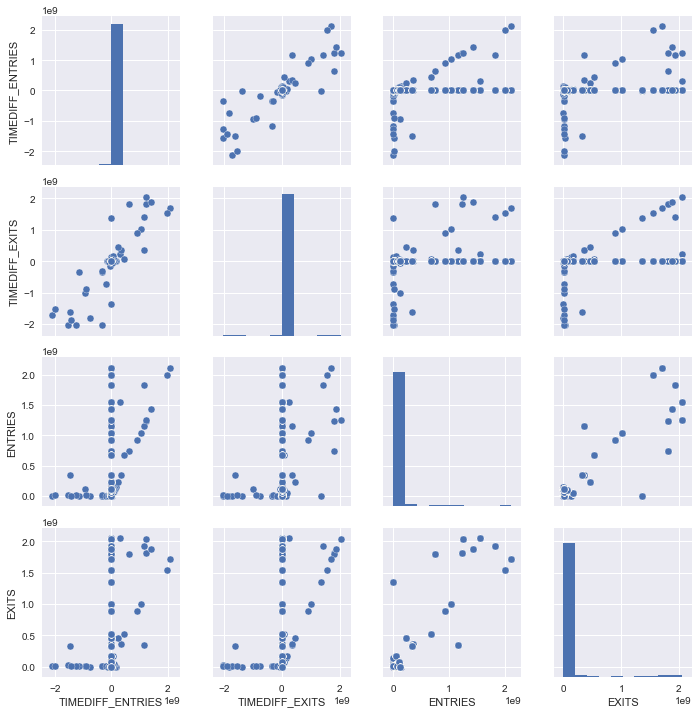

In [62]:
sns.pairplot(key_stations)